In [34]:
import pandas as pd
from pandas import Series,DataFrame

# ファイルを読み込んで、DataFrameを作ります。
titanic_df = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
sample_submission = pd.read_csv("gender_submission.csv")

In [2]:
# データの概要
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# 必要なモジュールをインポート
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/Users/takeuchiakirayuu/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

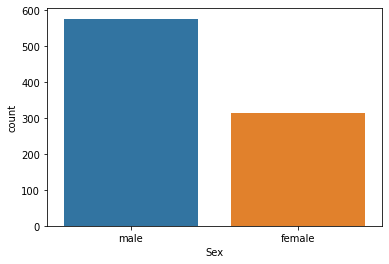

In [4]:
sns.countplot("Sex",data=titanic_df)

/Users/takeuchiakirayuu/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

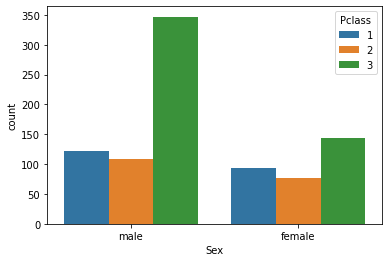

In [5]:
# 乗客の性別を客室で層別化
sns.countplot("Sex",data=titanic_df,hue="Pclass")

In [35]:
def male_female_child(passenger):
    age,sex = passenger
    if age<16:
        return "child"
    else:
        return sex
titanic_df["person"] = titanic_df[["Age","Sex"]].apply(male_female_child,axis=1)
test["person"]=test[["Age","Sex"]].apply(male_female_child,axis=1)

In [23]:

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


/Users/takeuchiakirayuu/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

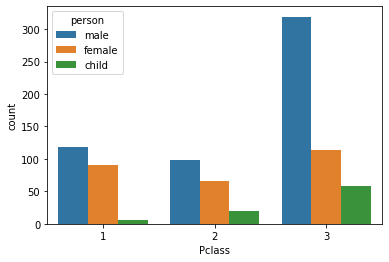

In [9]:
sns.countplot('Pclass',data=titanic_df,hue='person')

<AxesSubplot:>

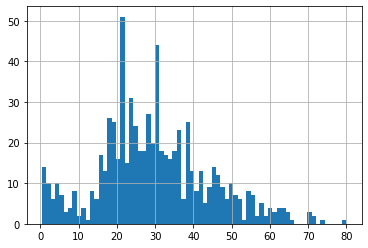

In [10]:
titanic_df['Age'].hist(bins=70)

In [12]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/Users/takeuchiakirayuu/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cabin', ylabel='count'>

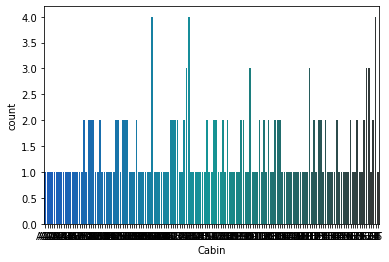

In [13]:
deck = titanic_df['Cabin'].dropna()
levels = []

# 1文字目を取り出します。
for level in deck:
    levels.append(level)
# DataFrameを作って、プロットします。
cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]

sns.countplot('Cabin',data=cabin_df,palette='winter_d',order=sorted(set(levels)))

In [14]:
titanic_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


In [15]:
from collections import Counter
Counter(titanic_df.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [16]:
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [17]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'


/Users/takeuchiakirayuu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [18]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


/Users/takeuchiakirayuu/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Alone', ylabel='count'>

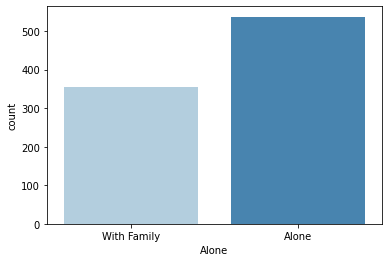

In [19]:
sns.countplot('Alone',data=titanic_df,palette='Blues')

/Users/takeuchiakirayuu/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/takeuchiakirayuu/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


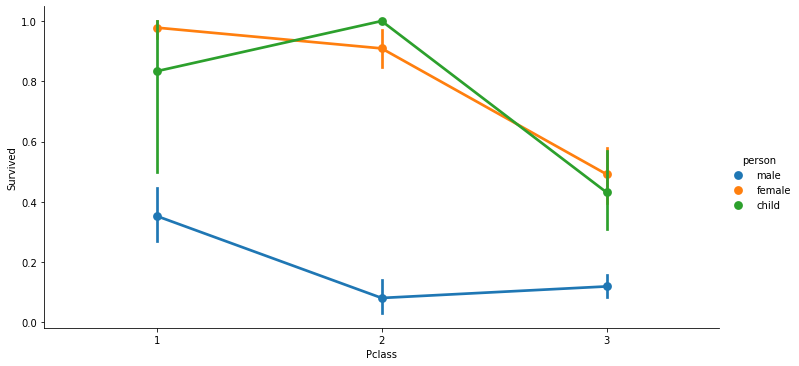

In [20]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df, order=[1,2,3], aspect=2)

In [36]:
train = pd.get_dummies(titanic_df, columns=['person', 'Embarked'])
test = pd.get_dummies(test, columns=['person', 'Embarked'])
 # 補足 : Sexは2値なので、One-Hotエンコーディングは不要(してもいいが普通はしない)ですが、今回は行なっています

# 不要な列の削除
train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket',"Sex"], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket',"Sex"], axis=1, inplace=True)

# trainの表示
display(train.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,person_child,person_female,person_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [37]:
X_train = train.drop(['Survived'], axis=1)  # X_trainはtrainのSurvived列以外
Y_train = train['Survived'] 

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   person      891 non-null    object 
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(5)
memory usage: 46.2+ KB


In [38]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X_trainとY_trainをtrainとvalidに分割
train_x, valid_x, train_y, valid_y = train_test_split(X_train, Y_train, test_size=0.33, random_state=0)

# LightGBMの分類器をインスタンス化
gbm = lgb.LGBMClassifier(objective='binary')

# trainとvalidを指定し学習
gbm.fit(train_x, train_y, eval_set = [(valid_x, valid_y)],
        early_stopping_rounds=20,  # 20回連続でlossが下がらなかったら終了
        verbose=10  # 10round毎に、lossを表示
) 

Training until validation scores don't improve for 20 rounds.
[10]	valid_0's binary_logloss: 0.462506
[20]	valid_0's binary_logloss: 0.422467
[30]	valid_0's binary_logloss: 0.407588
[40]	valid_0's binary_logloss: 0.408511
[50]	valid_0's binary_logloss: 0.412611
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.403279


LGBMClassifier(objective='binary')

In [39]:
oof = gbm.predict(valid_x, num_iteration=gbm.best_iteration_)  # oofはout of fold
print('score', round(accuracy_score(valid_y, oof)*100,2), '%')  # 正解率の表示

score 82.37 %


In [41]:
test_pred = gbm.predict(test, num_iteration=gbm.best_iteration_)  # testの予測
sample_submission['Survived'] = test_pred  # sample_submissionのSurvived列をtest_predに置き換え
sample_submission.to_csv('train_test_split.csv', index=False)  # csvファイルの書き出し

In [42]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)  # 3分割交差検証のためにインスタンス化

# スコアとモデルを格納するリスト
score_list = []
models = []

for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, Y_train)):
    train_x = X_train.iloc[train_index]
    valid_x = X_train.iloc[valid_index]
    train_y = Y_train[train_index]
    valid_y = Y_train[valid_index]
    
    print(f'fold{fold_ + 1} start')

    gbm = lgb.LGBMClassifier(objective='binary')
    gbm.fit(train_x, train_y, eval_set = [(valid_x, valid_y)],
                early_stopping_rounds=20,
                verbose= -1) # 学習の状況を表示しない
    
    oof = gbm.predict(valid_x, num_iteration=gbm.best_iteration_)
    score_list.append(round(accuracy_score(valid_y, oof)*100,2))
    models.append(gbm)  # 学習が終わったモデルをリストに入れておく
    print(f'fold{fold_ + 1} end\n' )
print(score_list, '平均score', np.mean(score_list), "%")  

fold1 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.471353
fold1 end

fold2 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.419235
fold2 end

fold3 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.376542
fold3 end

[81.14, 83.84, 84.51] 平均score 83.16333333333334 %


In [43]:
test_pred = np.zeros((len(test), 3))  # 行:len(test), 列:3のall zeroの配列を用意

for fold_, gbm in enumerate(models):  # 学習ずみのmodelをgbmに入れる
    pred_ = gbm.predict(test, num_iteration=gbm.best_iteration_)  # testの予測
    test_pred[:, fold_] = pred_  # １回目は0列目、2回目は1列目、2回目は3列目に格納

pred = (np.mean(test_pred, axis=1) > 0.5).astype(int)  # 平均をとって、0と１に変換
sample_submission['Survived'] = pred
sample_submission.to_csv('3-fold_cross-validation.csv',index = False)

In [44]:
gbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'binary',
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [45]:
from sklearn.model_selection import GridSearchCV

gbm = lgb.LGBMClassifier(objective='binary')

# 試行するパラメータを羅列する
params = {
    'max_depth': [2, 3, 4, 5],
    'reg_alpha': [0, 1, 10, 100],
    'reg_lambda': [0, 1, 10, 100],
}

grid_search = GridSearchCV(
                           gbm,  # 分類器を渡す
                           param_grid=params,  # 試行してほしいパラメータを渡す
                           cv=3,  # 3分割交差検証でスコアを確認
                          )

grid_search.fit(X_train, Y_train)  # データを渡す

print(grid_search.best_score_)  # ベストスコアを表示
print(grid_search.best_params_)  # ベストスコアのパラメータを表示

0.8327721661054994
{'max_depth': 4, 'reg_alpha': 0, 'reg_lambda': 1}


In [46]:
score_list = []
test_pred = np.zeros((len(test), 3))


for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, Y_train)):
    train_x = X_train.iloc[train_index]
    valid_x = X_train.iloc[valid_index]
    train_y = Y_train[train_index]
    valid_y = Y_train[valid_index]
    
    print(f'fold{fold_ + 1} start')

    gbm = lgb.LGBMClassifier(objective='binary', max_depth=3, reg_alpha=1,
                             reg_lambda=0)
    gbm.fit(train_x, train_y,
            eval_set = [(valid_x, valid_y)],
            early_stopping_rounds=20,
            verbose= -1)
    
    oof = gbm.predict(valid_x, num_iteration=gbm.best_iteration_)
    score_list.append(round(accuracy_score(valid_y, oof)*100,2))
    test_pred[:, fold_] = gbm.predict(test, num_iteration=gbm.best_iteration_)
    print(f'fold{fold_ + 1} end\n' )
print(score_list, '平均score', np.mean(score_list))
pred = (np.mean(test_pred, axis=1) > 0.5).astype(int)
sample_submission['Survived'] = pred
sample_submission.to_csv('glid_search.csv', index=False) 

fold1 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.452165
fold1 end

fold2 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.409556
fold2 end

fold3 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.380322
fold3 end

[79.8, 81.48, 82.83] 平均score 81.37


In [48]:
pd.DataFrame({'特徴量': X_train.columns,
    'importance':gbm.feature_importances_}).sort_values('importance',
    ascending=False)

,特徴量,importance
1,Age,98
4,Fare,89
0,Pclass,45
7,person_male,35
2,SibSp,18
10,Embarked_S,8
8,Embarked_C,7
3,Parch,6
9,Embarked_Q,4
6,person_female,2
